In [2]:
import pandas as pd
import yfinance as yf 
import datetime as dt
from datetime import date, timedelta

In [3]:
today = date.today()

In [5]:
d1 = today.strftime("%Y-%m-%d")

In [8]:
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',start=start_date,end=end_date,progress= False)

data["Date"] = data.index
data = data[["Date","Open","High","Low","Close","Adj Close","Volume"]]
data.reset_index(drop=True, inplace=True)

In [9]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500
1,2022-12-20,88.730003,89.779999,88.040001,89.629997,89.629997,21976800
2,2022-12-21,89.730003,90.915001,88.910004,90.250000,90.250000,20336400
3,2022-12-22,88.930000,89.180000,86.940002,88.260002,88.260002,23656100
4,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
5,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
6,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
7,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700
8,2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300
9,2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500


In [11]:
data_c = data[["Date","Close"]]

In [12]:
data_c.head(10)

,Date,Close
0,2022-12-19,89.150002
1,2022-12-20,89.629997
2,2022-12-21,90.250000
3,2022-12-22,88.260002
4,2022-12-23,89.809998
5,2022-12-27,87.930000
6,2022-12-28,86.459999
7,2022-12-29,88.949997
8,2022-12-30,88.730003
9,2023-01-03,89.699997


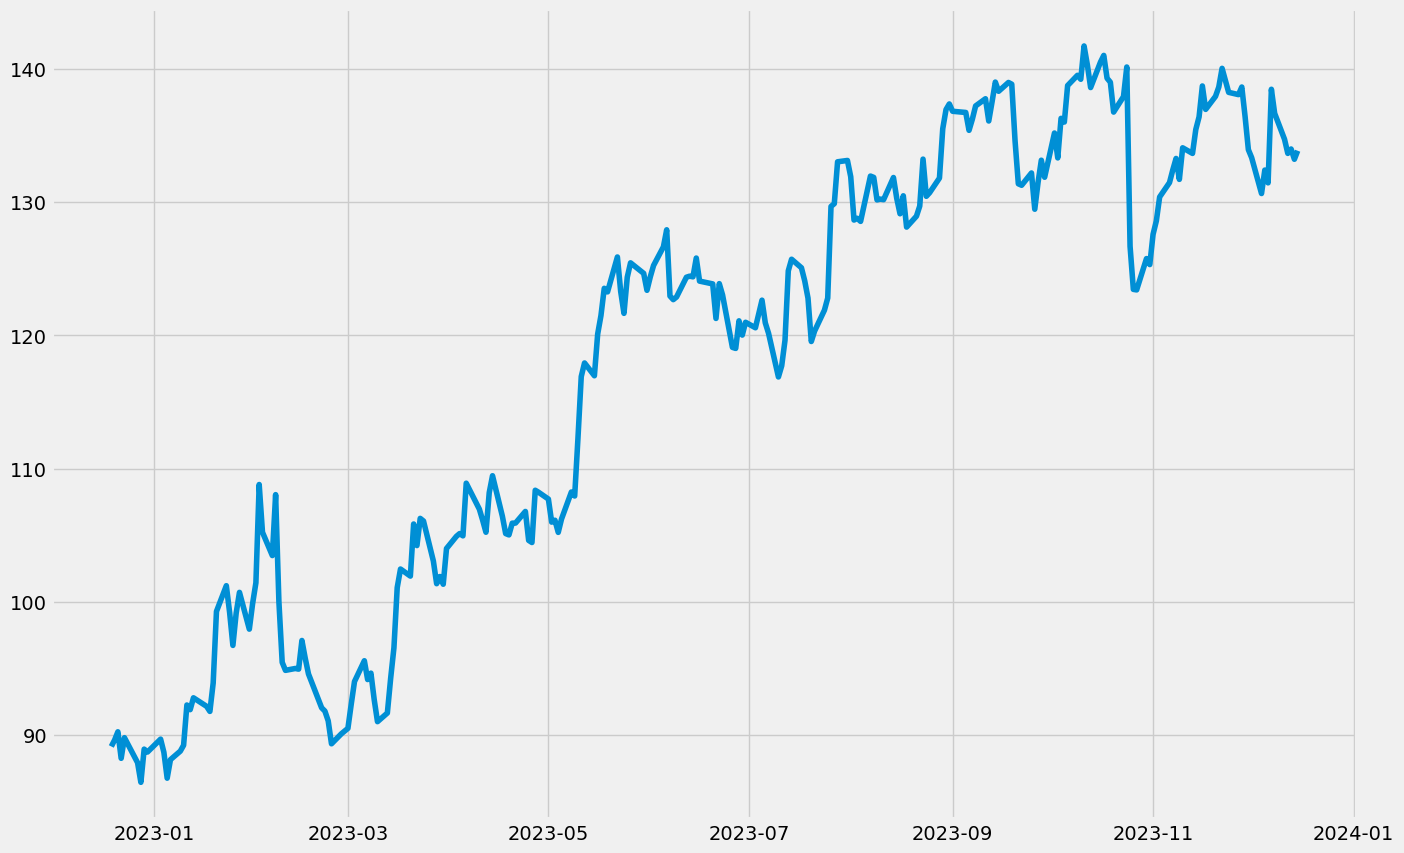

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Close"])

<Figure size 640x480 with 0 Axes>

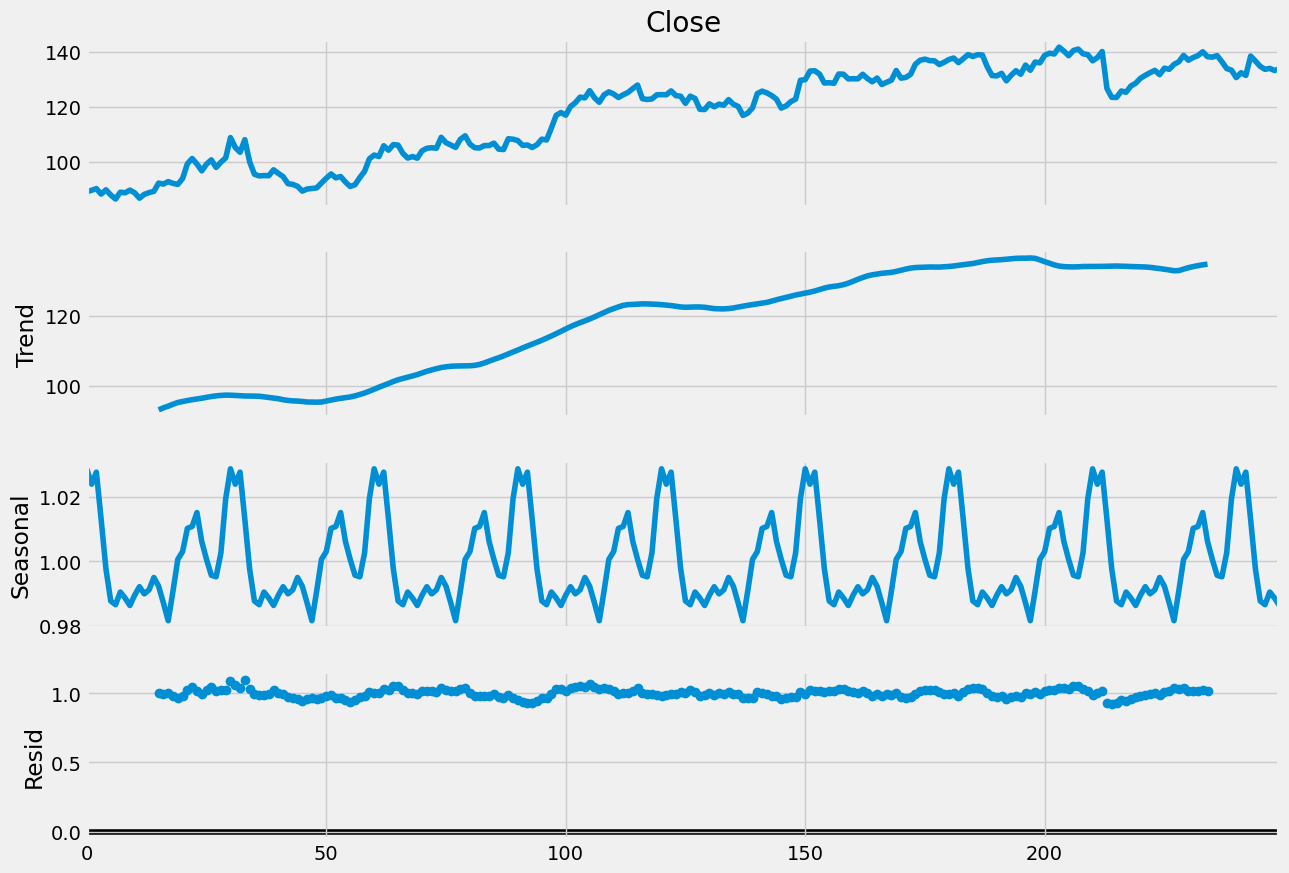

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],model='multiplicative',period = 30)
fig= plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

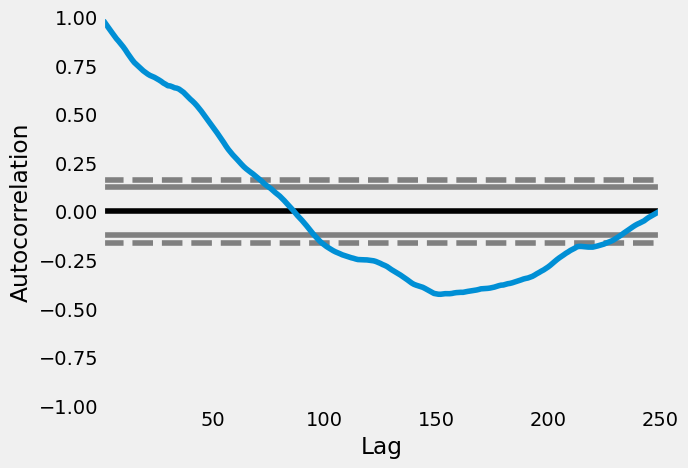

In [18]:
pd.plotting.autocorrelation_plot(data["Close"]) # p = 6

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf


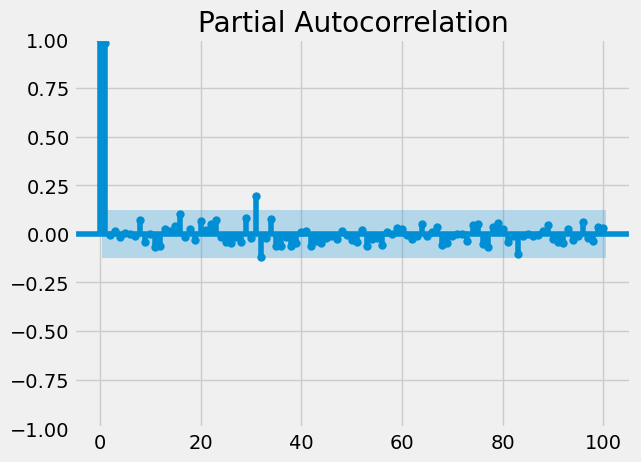

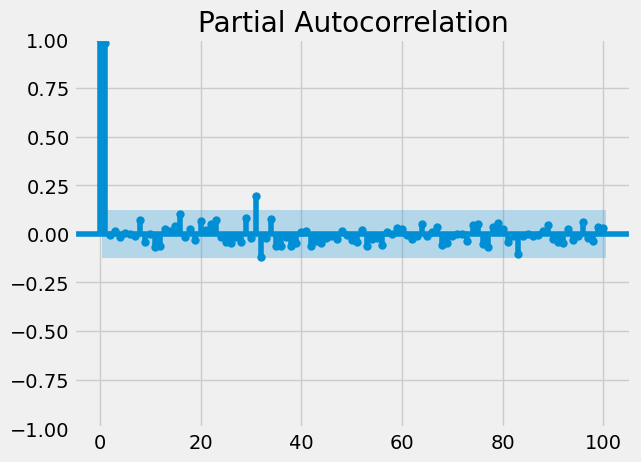

In [25]:
plot_pacf(data_c["Close"],lags=100,use_vlines=True) # q = 2

In [45]:
''' 
p is the order of autoredressive part, q = order of moving average part,
d is the degree of first differencing involved (0: stationary, 1: seasonal)
'''
p,q,d = 6,3,1

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"],order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -553.411
Date:                Mon, 18 Dec 2023   AIC                           1126.821
Time:                        23:26:44   BIC                           1161.996
Sample:                             0   HQIC                          1140.980
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6172      1.411      0.437      0.662      -2.148       3.382
ar.L2          0.0600      1.854      0.032      0.974      -3.574       3.694
ar.L3         -0.6262      1.288     -0.486      0.6

C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1       89.150014
2       89.643096
3       90.252509
4       88.173092
          ...    
245    136.796961
246    134.595172
247    133.421721
248    133.201710
249    132.599092
Name: predicted_mean, Length: 250, dtype: float64


In [30]:
data_c["Arima_Predicted"] = predictions

C:\Users\mahat\AppData\Local\Temp\ipykernel_21284\3438214162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c["Arima_Predicted"] = predictions


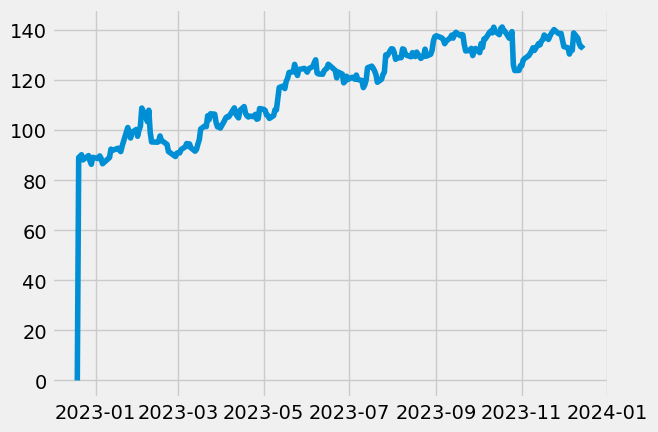

In [32]:
plt.plot(data_c["Date"],data_c["Arima_Predicted"])

In [46]:
import statsmodels.api as sm
import warnings
model = sm.tsa.statespace.SARIMAX(data["Close"],order=(p,d,q),seasonal_order=(p,d,q,12))

In [47]:
model = model.fit()

C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mahat\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(6, 1, 3)x(6, 1, 3, 12)   Log Likelihood                -539.933
Date:                            Mon, 18 Dec 2023   AIC                           1117.867
Time:                                    23:27:36   BIC                           1183.760
Sample:                                         0   HQIC                          1144.426
                                            - 250                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4515      4.133      0.109      0.913      -7.649       8.552
ar.L2          0.3973      5.946      0.067      0.947     -11.256      12.051
ar.L3         -0.9444      4.247     -0.222      0.824      -9.267       7.379
ar.L4          0.0172      0.292      0.059      0.953      -0.556       0.590
ar.L5         -0.0737      0.220     -0.334      0.738      -0.506       0.358
ar.L6         -0.0188      0.130     -0.144      0.885      -0.274       0.237
ma.L1         -0.4621      4.098     -0.113      0.910      -8.493       7.569
ma.L2         -0.4481      5.946     -0.075      0.940     -12.102      11.206
ma.L3          0.9762      4.044      0.241      0.809      -6.951       8.903
ar.S.L12       0.0429      0.875      0.049      0.961      -1.672       1.758
ar.S.L24      -0.0372      0.840     -0.044      0.965      -1.684       1.610
ar.S.L36      -0.0135      0.424     -0.032      0.975      -0.844       0.817
ar.S.L48       0.0859      0.378      0.227      0.820      -0.656       0.828
ar.S.L60       0.1169      0.307      0.381      0.703      -0.485       0.719
ar.S.L72       0.2407      0.206      1.170      0.242      -0.162       0.644
ma.S.L12      -1.0231      0.902     -1.134      0.257      -2.792       0.745
ma.S.L24       0.1667      0.789      0.211      0.833      -1.380       1.713
ma.S.L36      -0.0692      0.516     -0.134      0.893      -1.081       0.943
sigma2         5.0511      0.514      9.828      0.000       4.044       6.058
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               217.25
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.55
Prob(H) (two-sided):                  0.85   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
predictions_S = model.predict(len(data), len(data) + 10)

In [65]:
print(predictions_S)

250    132.964520
251    134.313540
252    134.901474
253    136.201222
254    136.417894
255    136.476645
256    136.724789
257    135.845977
258    136.007031
259    136.525041
260    136.706907
Name: predicted_mean, dtype: float64


<Axes: >

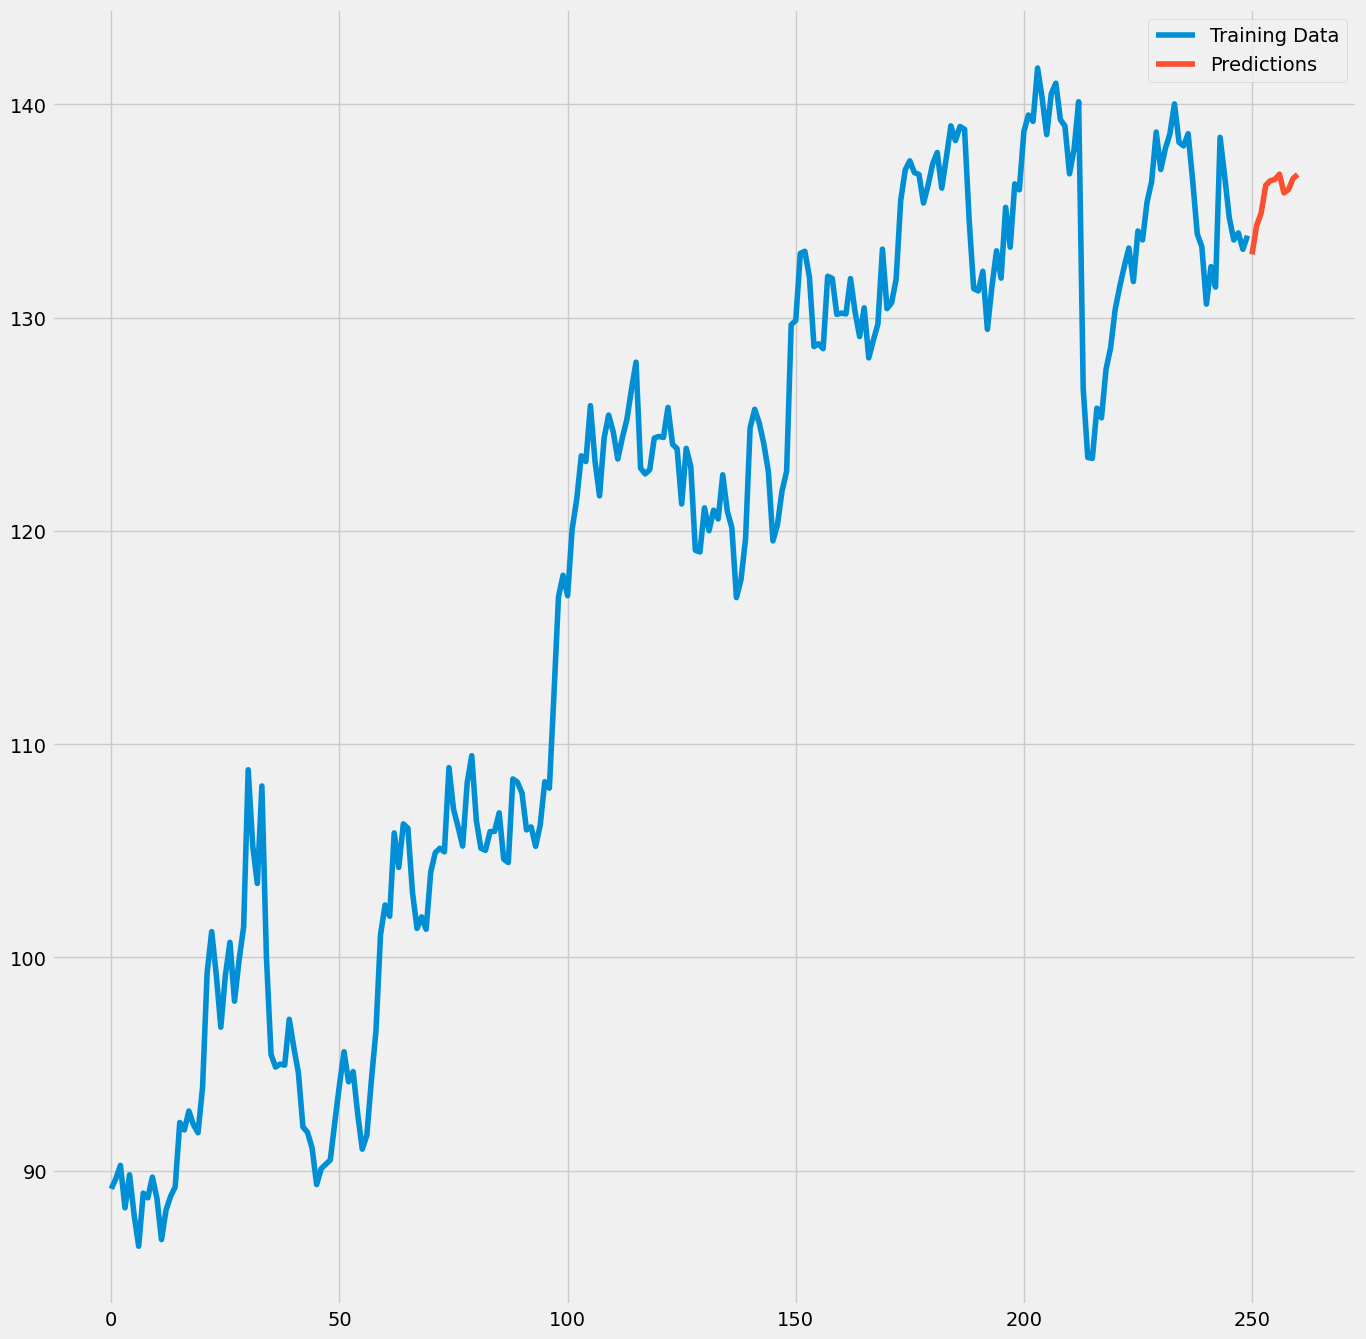

In [66]:
data["Close"].plot(legend=True, label="Training Data", figsize = (15,16))
predictions_S.plot(legend=True, label= "Predictions")